<a href="https://colab.research.google.com/github/Nagu34/Thesis/blob/main/ESC_50_Datatet_Augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#package imports
import os
import random
import sys
import glob 
import keras

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

## extra added 
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy import stats
import warnings
import seaborn as sns
import multiprocessing as mp
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy import stats
import warnings
import seaborn as sns
import multiprocessing as mp
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('/content/drive/My Drive/ESC-50-master/ESC_RGBA_224/2-118964-A-0.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(224, 224, 4)
<class 'PIL.Image.Image'>
RGBA
(224, 224)


In [ ]:
labels1 = np.load('/content/drive/MyDrive/ESC-50-master/labels_128.npy',allow_pickle=True) 
labels_aug = np.load('/content/drive/MyDrive/ESC-50-master/labels_128_aug.npy',allow_pickle=True) 

In [ ]:
labels1.shape

(2000,)

In [ ]:
labels=np.append(labels1,labels_aug)

In [ ]:
labels

array([0, 14, 36, ..., 0, 0, 0], dtype=object)

In [ ]:
#labels = data_df.sound.values

# convert class vectors to binary class matrices One Hot Encoding
labels = keras.utils.to_categorical(labels, 50)

In [ ]:
np.save('/content/drive/MyDrive/ESC-50-master/labels_augmentedfull1.npy',labels) 

In [ ]:
labels.shape

(2000, 50)

In [ ]:
x_train_spectrogram = np.load('/content/drive/MyDrive/ESC-50-master/x_train_rgb_128_esc_spectrogram.npy')
x_train_spectrogram_aug = np.load('/content/drive/MyDrive/ESC-50-master/x_train_rgb_128_esc_spectrogram_aug.npy')
x_train_chroma = np.load('/content/drive/MyDrive/ESC-50-master/x_train_rgb_128_esc_chroma.npy')
x_train_chroma_aug = np.load('/content/drive/MyDrive/ESC-50-master/x_train_rgb_128_esc_chroma_aug.npy')

In [ ]:
x_train_chroma_new=np.append(x_train_chroma,x_train_chroma_aug,axis=0)
np.save('/content/drive/MyDrive/ESC-50-master/x_train_rgb_128_chroma_augmentedfull.npy', x_train_chroma_new)

In [ ]:
x_train_spectrogram_new=np.append(x_train_spectrogram,x_train_spectrogram_aug,axis=0)
np.save('/content/drive/MyDrive/ESC-50-master/x_train_rgb_128_spectrogram_augmentedfull.npy', x_train_spectrogram_new)

In [ ]:
featuresdf=pd.read_pickle('/content/drive/MyDrive/ESC-50-master/esc_mfcc_aug.pkl')
featuresdf_old=pd.read_pickle('/content/drive/MyDrive/ESC-50-master/esc_mfcc.pkl')

In [ ]:
x_train_spectrogram_new.shape

(10000, 128, 128, 3)

In [ ]:
features_df=featuresdf_old.append(featuresdf)

In [ ]:
labels = np.load('/content/drive/MyDrive/ESC-50-master/labels_augmentedfull1.npy',allow_pickle=True) 
x_train_spectrogram = np.load('/content/drive/MyDrive/ESC-50-master/x_train_rgb_128_spectrogram_augmentedfull.npy',allow_pickle=True)
x_train_chroma = np.load('/content/drive/MyDrive/ESC-50-master/x_train_rgb_128_chroma_augmentedfull.npy',allow_pickle=True)

In [ ]:
x_train_spectrogram.shape

(10000, 128, 128, 3)

In [ ]:
labels.shape

(10000, 50)

In [ ]:
#x_train_spectrogram = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_224_spectrogram.npy') 
x_train_spectrogram, x_test_spectrogram, y_train, y_test = train_test_split(x_train_spectrogram, labels, test_size = 0.2, random_state=666)
x_train_chroma, x_test_chroma, y_train, y_test = train_test_split(x_train_chroma, labels, test_size = 0.2, random_state=666)

In [ ]:
#x_train_spectrogram = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_224_spectrogram.npy') 
x_train_spectrogram, x_test_spectrogram, y_spec_train, y_spec_test = train_test_split(x_train_spectrogram, labels, test_size = 0.2, random_state=666)
x_train_chroma, x_test_chroma, y_chr_train, y_chr_test = train_test_split(x_train_chroma, labels, test_size = 0.2, random_state=666)

In [ ]:
#x_train_spectrogram = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_224_spectrogram.npy') 
x_val_spectrogram, x_test_spectrogram, y_val, y_test = train_test_split(x_test_spectrogram, y_spec_test, test_size = 0.5, random_state=666)
x_val_chroma, x_test_chroma, y_val, y_test = train_test_split(x_test_chroma, y_chr_test, test_size = 0.5, random_state=666)

In [ ]:
x_train_chroma.shape

(8000, 128, 128, 3)

In [ ]:
x_train_spectrogram_new=np.append(x_train_spectrogram,x_train_spectrogram_aug,axis=0)

In [ ]:
x_train_spectrogram_new.shape

(11302, 224, 224, 3)

In [ ]:
x_train_spectrogram, x_test_spectrogram, y_train, y_test = train_test_split(x_train_spectrogram_new, labels, test_size = 0.2, random_state=666)

In [ ]:
np.save('/content/drive/My Drive/UrbanSound8K/x_train_rgb_224_spectrogram_augmentedfull.npy', x_train_spectrogram_new)
np.save('/content/drive/My Drive/UrbanSound8K/labels_augmentedfull.npy', labels)

In [ ]:
def create_convolution_layers(input_img):
  model = Conv2D(32, (3, 3), padding='same', input_shape=input_shape)(input_img)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(64, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(64, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)

  model = Conv2D(128, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)

  model = GlobalAveragePooling2D()(model)
    
  return model

In [ ]:
def create_convolution_layers1(input_img):
    base_model2 = keras.applications.InceptionV3(weights='imagenet',include_top=False)
    x = base_model2(input_img, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)
    #x = Flatten()(x)
    return x


In [ ]:
def create_convolution_layers2(input_img):
    base_model2 = keras.applications.VGG19(weights='imagenet',include_top=False)
    x = base_model2(input_img, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    #x = keras.layers.GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    return x

In [ ]:
def create_convolution_layers3(input_img):
    base_model2 = keras.applications.Xception(weights='imagenet',include_top=False)
    x = Conv2D(3,(3,3),padding='same')(input_img)
    x = base_model2(x, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    #x = keras.layers.GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    return x

In [ ]:
as_gray = False
in_channel = 3

if as_gray:
  in_channel = 1

img_rows, img_cols = 128, 128
num_classes = 50 # number of appliances

batch_size = 32
epochs = 100
input_shape = (img_rows, img_cols, in_channel)
input_img = Input(shape = input_shape)

In [ ]:
spectrogram_input = Input(shape=input_shape)
spectrogram_model = create_convolution_layers(spectrogram_input)

chroma_input = Input(shape=input_shape)
chroma_model = create_convolution_layers(chroma_input)

In [ ]:
features_df=pd.read_pickle('/content/drive/MyDrive/ESC-50-master/mfcc_augemtedfull_128.pkl')

In [ ]:
features_df.shape

(10000, 2)

In [ ]:
X = np.array(features_df.feature.tolist())

In [ ]:
X.shape

(10000, 40, 217)

In [ ]:
labels.shape

(10000, 50)

In [ ]:
x_train_mfcc, x_test_mfcc, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state = 666)

num_rows = 40
num_columns = 217
num_channels = 1

x_train_mfcc = x_train_mfcc.reshape(x_train_mfcc.shape[0], num_rows, num_columns, num_channels)
x_test_mfcc = x_test_mfcc.reshape(x_test_mfcc.shape[0], num_rows, num_columns, num_channels)

In [ ]:
x_train_mfcc, x_test_mfcc, y_mfcc_train, y_mfcc_test = train_test_split(X, labels, test_size=0.2, random_state = 666)
x_val_mfcc, x_test_mfcc, y_val, y_test = train_test_split(x_test_mfcc, y_mfcc_test, test_size = 0.5, random_state=666)

num_rows = 40
num_columns = 217
num_channels = 1

x_train_mfcc = x_train_mfcc.reshape(x_train_mfcc.shape[0], num_rows, num_columns, num_channels)
x_test_mfcc = x_test_mfcc.reshape(x_test_mfcc.shape[0], num_rows, num_columns, num_channels)
x_val_mfcc = x_val_mfcc.reshape(x_val_mfcc.shape[0], num_rows, num_columns, num_channels)

In [ ]:
num_rows = 40
num_columns = 217
num_channels = 1
input_shape=(num_rows, num_columns, num_channels)
mfcc_input = Input(shape=input_shape)
mfcc_model = create_convolution_layers(mfcc_input)

In [ ]:

from keras.layers import multiply,dot,average,GlobalMaxPooling2D
#chroma_input = Input(shape=input_shape)
#chroma_model = create_convolution_layers(chroma_input)

#conv = concatenate([spectrogram_model, chroma_model,mfcc_model])
conv = concatenate([spectrogram_model,chroma_model,mfcc_model])#,mfcc_model])
#conv = Flatten()(mfcc_model)

dense = Dense(500)(conv)

dense = Dropout(0.5)(dense)

output = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=[spectrogram_input,chroma_input,mfcc_input], outputs=[output])

opt = optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 40, 217, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
import torch

In [ ]:
num_classes

50

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 256

num_epochs = 200
num_batch_size = 128

#checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/UrbanSound8K/weights_spe_chr_mfcc.best.basic_cnn.hdf5', verbose=1, save_best_only=True)
#callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
start = datetime.now()




history=model.fit([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_spec_train,
          batch_size=num_batch_size,
          epochs=num_epochs,
          verbose=1,
          validation_data=([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val), #callbacks=[checkpointer],
          shuffle=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
63/63 [==============================] - 9s 139ms/step - loss: 3.9303 - accuracy: 0.0634 - val_loss: 3.2125 - val_accuracy: 0.1370
Epoch 2/200
63/63 [==============================] - 8s 126ms/step - loss: 2.8855 - accuracy: 0.1964 - val_loss: 2.5929 - val_accuracy: 0.2560
Epoch 3/200
63/63 [==============================] - 8s 126ms/step - loss: 2.3380 - accuracy: 0.3205 - val_loss: 2.0772 - val_accuracy: 0.3910
Epoch 4/200
63/63 [==============================] - 8s 125ms/step - loss: 1.8468 - accuracy: 0.4442 - val_loss: 1.8183 - val_accuracy: 0.4440
Epoch 5/200
63/63 [==============================] - 8s 125ms/step - loss: 1.5430 - accuracy: 0.5325 - val_loss: 1.3328 - val_accuracy: 0.5890
Epoch 6/200
63/63 [==============================] - 8s 126ms/step - loss: 1.2889 - accuracy: 0.6108 - val_loss: 1.2703 - val_accuracy: 0.6220
Epoch 7/200
63/63 [==============================] - 8s 125ms/step - loss: 1.0854 - accuracy: 0.6687 - val_loss: 1.0399 - val_accuracy: 0.6920

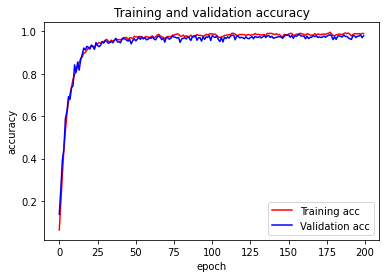

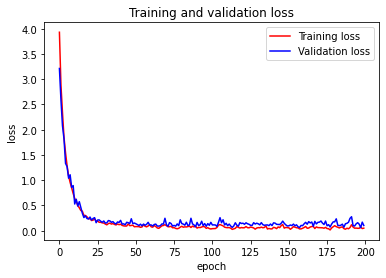

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:

final_loss, final_acc = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc],y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

final_loss, final_acc = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))



32/32 [==============================] - 1s 17ms/step - loss: 0.1489 - accuracy: 0.9750
Final loss: 0.148853, final accuracy: 0.975000
32/32 [==============================] - 0s 14ms/step - loss: 0.1033 - accuracy: 0.9790
Final loss: 0.103256, final accuracy: 0.979000


In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_spec_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Test Accuracy: ", score[1])

score = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=0)
print("val Accuracy: ", score[1])

Training Accuracy:  0.9991250038146973
Test Accuracy:  0.9750000238418579
val Accuracy:  0.9789999723434448


In [ ]:

final_loss, final_acc = model.evaluate([x_test_chroma,x_test_mfcc],y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

final_loss, final_acc = model.evaluate([x_val_chroma,x_val_mfcc], y_val, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))



32/32 [==============================] - 0s 8ms/step - loss: 0.2436 - accuracy: 0.9760
Final loss: 0.243642, final accuracy: 0.976000
32/32 [==============================] - 0s 8ms/step - loss: 0.2256 - accuracy: 0.9750
Final loss: 0.225625, final accuracy: 0.975000


In [ ]:
score = model.evaluate([x_train_chroma,x_train_mfcc], y_spec_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Test Accuracy: ", score[1])

score = model.evaluate([x_val_chroma,x_val_mfcc], y_val, verbose=0)
print("val Accuracy: ", score[1])

Training Accuracy:  0.9993749856948853
Test Accuracy:  0.9760000109672546
val Accuracy:  0.9750000238418579


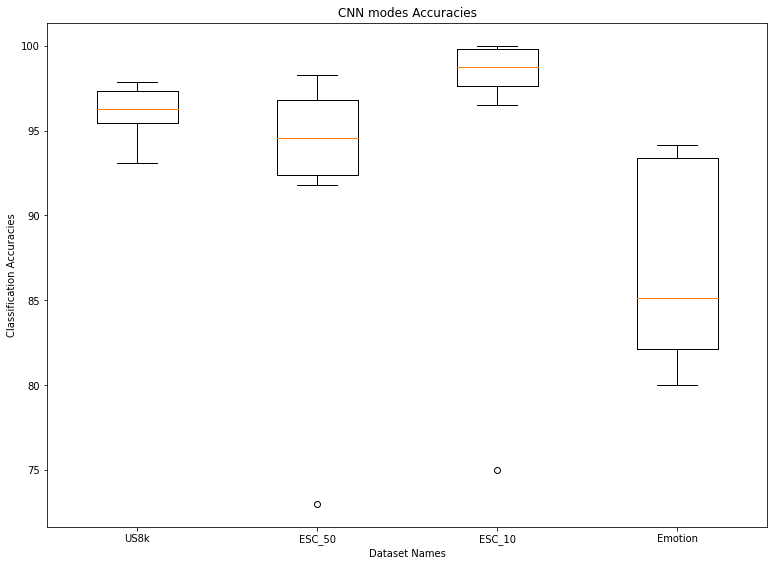

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
  
  
# Creating dataset 
#np.random.seed(10) 
  
urban_sound = [95.50,97.46,97.84,96.28,93.09,97.30,95.30,96.33] 
ESC_50 = [73.00,96.89,96.79,91.79,93.19,95.89,98.27,92.59]
ESC_10 = [75.00,99.90,100,99.50,98.00,99.75,98.00,96.49] 
Emotion = [82.60,93.88,94.16,82.499,80.02,93.19,87.63,80.97] 
data = [urban_sound, ESC_50, ESC_10, Emotion] 
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_axisbelow(True)
ax.set_title('CNN modes Accuracies')
ax.set_xlabel('Dataset Names')
ax.set_ylabel('Classification Accuracies')

# Creating plot 
bp = ax.boxplot(data) 
plt.xticks([1, 2, 3,4], ['US8k', 'ESC_50', 'ESC_10','Emotion'])
plt.show()

In [ ]:
def Average(lst): 
    return sum(lst) / len(lst) 
  
# Driver Code 
urban_sound = [95.50,97.46,97.84,96.28,93.09,97.30,95.30,96.33] 
ESC_50 = [73.00,96.89,96.79,91.79,93.19,95.89,98.27,92.59]
ESC_10 = [75.00,99.90,100,99.50,98.00,99.75,98.00,96.49] 
Emotion = [82.60,93.88,94.16,82.499,80.02,93.19,87.63,80.97] 
average = Average(Emotion) 
  
# Printing average of the list 
print("Average of the list =", round(average, 2)) 

Average of the list = 86.87
